# Проектная работа 

## Маркетинговый анализ развлекательного приложения **Procrastinate Pro+**

## Описание проекта

Проект посвящен маркетинговому анализу развлекательного приложения **Procrastinate Pro+** на основе данных о пользователях, привлеченных в период с 1 мая по 27 октября 2019 года. В рамках анализа были использованы следующие датасеты:
* лог сервера с данными об их посещениях `visits_info_short.csv`
* выгрузка их покупок за этот период `orders_info_short.csv`
* рекламные расходы `costs_info_short.csv`

### Структура датасетов:

### Структура **visits_info_short.csv**:

* **User Id** — уникальный идентификатор пользователя,
* **Region** — страна пользователя,
* **Device** — тип устройства пользователя,
* **Channel** — идентификатор источника перехода,
* **Session Start** — дата и время начала сессии,
* **Session End** — дата и время окончания сессии.

### Структура **orders_info_short.csv**:

* **User Id** — уникальный идентификатор пользователя,
* **Event Dt** — дата и время покупки,
* **Revenue** — сумма заказа.

### Структура **costs_info_short.csv**:

* **dt** — дата проведения рекламной кампании,
* **Channel** — идентификатор рекламного источника,
* **costs** — расходы на эту кампанию.

## Загрузка библотек

In [1]:
import pandas as pd 
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
import numpy as np


## Загрузка данных

In [2]:
try:
    visit = pd.read_csv('C:\\Users\\shmam\\datasets\\visits_info_short.csv')
except:
    visit = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

try:
    order = pd.read_csv('C:\\Users\\shmam\\datasets\\orders_info_short.csv')
except:
    order = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

try:
    cost = pd.read_csv('C:\\Users\\shmam\\datasets\\costs_info_short.csv')
except:
    cost = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

## Предобработка данных

Создадим функции для получения информации о датасетах

In [3]:
#создаем функцию  для ознакомления с датасетами
def table_info(table_name):
    display(table_name.head())
    print(table_name.info())
    print(f'В таблице пропущенно:')
    print(f'{table_name.isna().sum()}')
    print(f'В таблицк дубликатов: {visit.duplicated().sum()}')

In [4]:
#создаем функцию  для проверки изменений
def end_info(table_name):
    print(f'В таблицк дубликатов: {visit.duplicated().sum()}')
    print(table_name.info())

### Датасет **visit**

In [5]:
table_info(visit)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
В таблице пропущенно:
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
В таблицк дубликатов: 0


In [6]:
#переименовываем название столбцов 
visit.columns = ['user_id','region','device','channel','session_start','session_end']

In [7]:
#проверяем уникальные значения 
for name in ['region','device','channel']:
    print(f'Уникальные значения в столбце {name}')
    print(visit[name].unique())

Уникальные значения в столбце region
['United States' 'UK' 'France' 'Germany']
Уникальные значения в столбце device
['iPhone' 'Mac' 'Android' 'PC']
Уникальные значения в столбце channel
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [8]:
#изменяем тип данных
visit['session_start'] = pd.to_datetime(visit['session_start'])
visit['session_end'] = pd.to_datetime(visit['session_end'])

In [9]:
end_info(visit)

В таблицк дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None


Датасет **visit** был обработан, при этом имена столбцов приведены к стандарту `snake_case`. Кроме того, типы данных некоторых столбцов были изменены. В датасете не было обнаружено пропущенных значений или дубликатов.

### Датасет **order**

In [10]:
table_info(order)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
В таблице пропущенно:
User Id     0
Event Dt    0
Revenue     0
dtype: int64
В таблицк дубликатов: 0


In [11]:
order.columns = ['user_id','event_dt','revenue']

order['event_dt'] = pd.to_datetime(order['event_dt'])

In [12]:
end_info(order)

В таблицк дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None


Датасет **order** был обработан, при этом имена столбцов приведены к стандарту `snake_case`. Кроме того, типы данных некоторых столбцов были изменены. В датасете не было обнаружено пропущенных значений или дубликатов.

### Датасет **cost**

In [13]:
table_info(cost)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
В таблице пропущенно:
dt         0
Channel    0
costs      0
dtype: int64
В таблицк дубликатов: 0


In [14]:
cost.columns = ['dt','channel','costs']

cost['dt'] = pd.to_datetime(cost['dt'])

print(f'Уникальные значения в столбце channel')
print(cost['channel'].unique())

Уникальные значения в столбце channel
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


In [15]:
end_info(cost)

В таблицк дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None


Датасет **cost** был обработан, при этом имена столбцов приведены к стандарту `snake_case`. Кроме того, типы данных некоторых столбцов были изменены. В датасете не было обнаружено пропущенных значений или дубликатов.

### Вывод

Все три предоставленные датасеты **visit**, **order** и **cost** были успешно обработаны. Для каждого датасета были выполнены следующие действия:

* Имена столбцов были приведены к стандарту `snake_case` для соблюдения единообразия.
* Типы данных некоторых столбцов были изменены для обеспечения корректного представления данных.
* Проверка на наличие пропущенных значений и дубликатов показала отсутствие таковых в каждом из датасетов.

Таким образом, все три датасета были подготовлены для дальнейшего анализа и использования в соответствии со стандартами и требованиями к качеству данных.

## Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии

Создадим функции необходимые для анализа и вузализации.

In [16]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('CAC')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Точка безубыточности')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Точка безубыточности')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.legend()
    plt.tight_layout()
    plt.show() 

def split(dimensions,window):
    # считаем LTV и ROI
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles, order, observation_date, horizon_days, dimensions=dimensions
    )
    # строим графики
    plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=window) 

### Вывод

Были написаны функции, предназначенные для анализа ключевых показателей в области пользовательского поведения и финансовой эффективности. 

Функции `get_profiles()`, `get_retention()`, `get_conversion()`, и `get_ltv()` позволяют вычислять профили пользователей, коэффициент удержания (Retention Rate), конверсию, а также пожизненную ценность клиента (LTV) соответственно. 

Дополнительно, функции `filter_data()`, `plot_retention()`, `plot_conversion()`, и `plot_ltv_roi()` обеспечивают возможность обработки и визуализации данных, что облегчает интерпретацию результатов и принятие управленческих решений. 

Эти инструменты эффективно работают вместе для предоставления комплексного анализа данных, что особенно ценно для стратегического планирования и оптимизации маркетинговых стратегий.

## Исследовательский анализ данных

### Профили пользователей 

Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'])
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = pd.to_datetime(profiles['first_ts']).dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [21]:
#определим профили пользователей
profiles = get_profiles(visit, order, cost)

profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
profiles['month'] = pd.to_datetime(profiles['first_ts']).dt.month

#определим минимальную дату
min_analysis_date = profiles['dt'].min()
#определим максимальную дату
observation_date = profiles['dt'].max() 

print(f'Минимальная дата привлевчения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлевчения пользователей: {observation_date}')

Минимальная дата привлевчения пользователей: 2019-05-01
Максимальная дата привлевчения пользователей: 2019-10-27


Для анализа были подготовлены профили пользователей, содержащие информацию о датах регистрации, покупках и суммах покупок. Также были определены крайние даты привлечения пользователей: **2019-05-01** (минимальная) и **2019-10-27** (максимальная). 

### Регионы пользователей

Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [22]:
#напишем функцию для групировки
def share(group,f_col,t_col):
    share = pd.DataFrame()
    share[f_col] = profiles.groupby(group)['user_id'].count()
    share[t_col] = profiles.query('payer == True').groupby(group)['user_id'].count()
    share['share_users'] = ((share[t_col] / share[f_col]) * 100)
    share = share.sort_values(by='share_users', ascending=False).style.format({'share_users': '{:.1f}%'})
    display(share)

share('region','users_сount','payer_users_count')

,users_сount,payer_users_count,share_users
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


Результаты анализа географического распределения пользователей представлены в виде таблицы, отражающей количество пользователей и долю платящих пользователей из каждой страны.

Лидером по количеству пользователей является **United States**. Это означает, что наибольшее число пользователей приложения проживает в США.

Помимо этого, **United States** также лидирует по доле платящих пользователей среди всех стран. Таким образом, помимо большой базы пользователей, США демонстрирует высокий уровень монетизации аудитории.

### Устройства пользователей

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [23]:
share('device','users_сount','payer_users_count')

,users_сount,payer_users_count,share_users
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Результаты анализа представлены в виде таблицы, отражающей количество пользователей и долю платящих пользователей из каждой категории устройств.

Лидером по количеству пользователей является категория **iPhone**. Это означает, что большинство пользователей приложения используют смартфоны iPhone.

Однако лидером по доле платящих пользователей является категория **Mac**. Таким образом, несмотря на меньшее количество пользователей, владельцы устройств Mac демонстрируют наибольшую склонность к совершению покупок в приложении.

### Источники привлечения пользователей 

Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [24]:
share('channel','users_сount','payer_users_count')

,users_сount,payer_users_count,share_users
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


Результаты анализа источников привлечения пользователей представлены в виде таблицы, отражающей количество привлеченных пользователей и долю платящих пользователей из каждого источника.

Лидером по количеству привлеченных пользователей является источник **FaceBoom**. Это означает, что данный источник обеспечил наибольший приток новых пользователей приложения.

Кроме того, источник **FaceBoom** также лидирует по доле платящих привлеченных пользователей. Таким образом, пользователи, привлеченные из FaceBoom, демонстрируют наибольшую склонность к совершению покупок в приложении.

### Вывод

В ходе анализа были подготовлены профили пользователей и определен период привлечения новых пользователей **с мая по октябрь 2019 года**. 

Далее были проанализированы различные аспекты пользовательской базы, включая географическое распределение, типы устройств и источники привлечения.

**Рынок США является лидером** как по количеству пользователей, так и по доле платящих пользователей, что свидетельствует о высокой популярности и эффективной монетизации приложения на данном рынке.

Среди устройств **наибольшее количество пользователей приходится на iPhone**, однако **наибольшая доля платящих пользователей наблюдается среди владельцев Mac**.

Источник привлечения **FaceBoom обеспечил наибольший приток новых пользователей и демонстрирует высокую долю платящих привлеченных пользователей**.

## Маркетинг

### Расходы на маркетинг

Посчитайте общую сумму расходов на маркетинг.

In [25]:
print(f'Общая сумма расходов на маркетинг составила {cost['costs'].sum().round()}')

Общая сумма расходов на маркетинг составила 105497.0


### Распределение расходов на маркетинг 

Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [26]:
(
    cost
    .groupby('channel')['costs']
    .sum()
    .sort_values(ascending=False)
)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

Расходы на маркетинг распределены по рекламным источникам следующим образом, **наибольшие траты были на TipTop и FaceBoom**, что указывает на их ключевую роль в маркетинговой стратегии.В то же время как **меньшие суммы были выделены на YRabbit и MediaTornado**.

### Динамика изменения расходов на маркетинг

Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

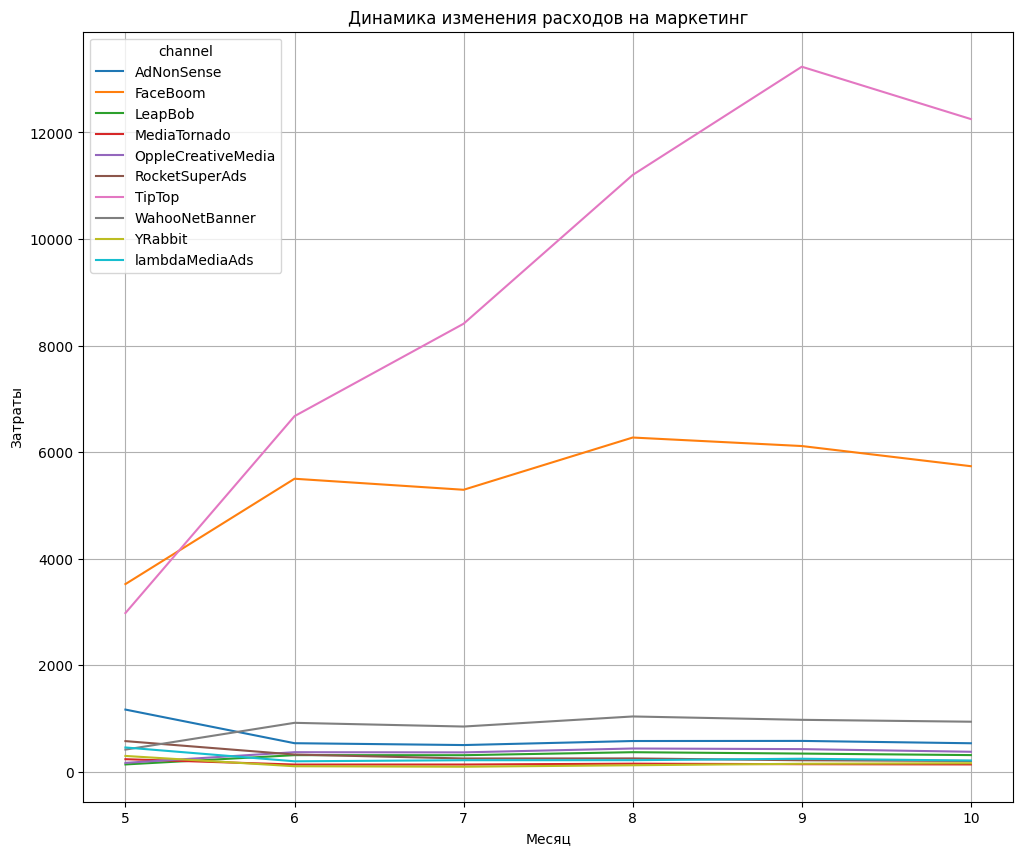

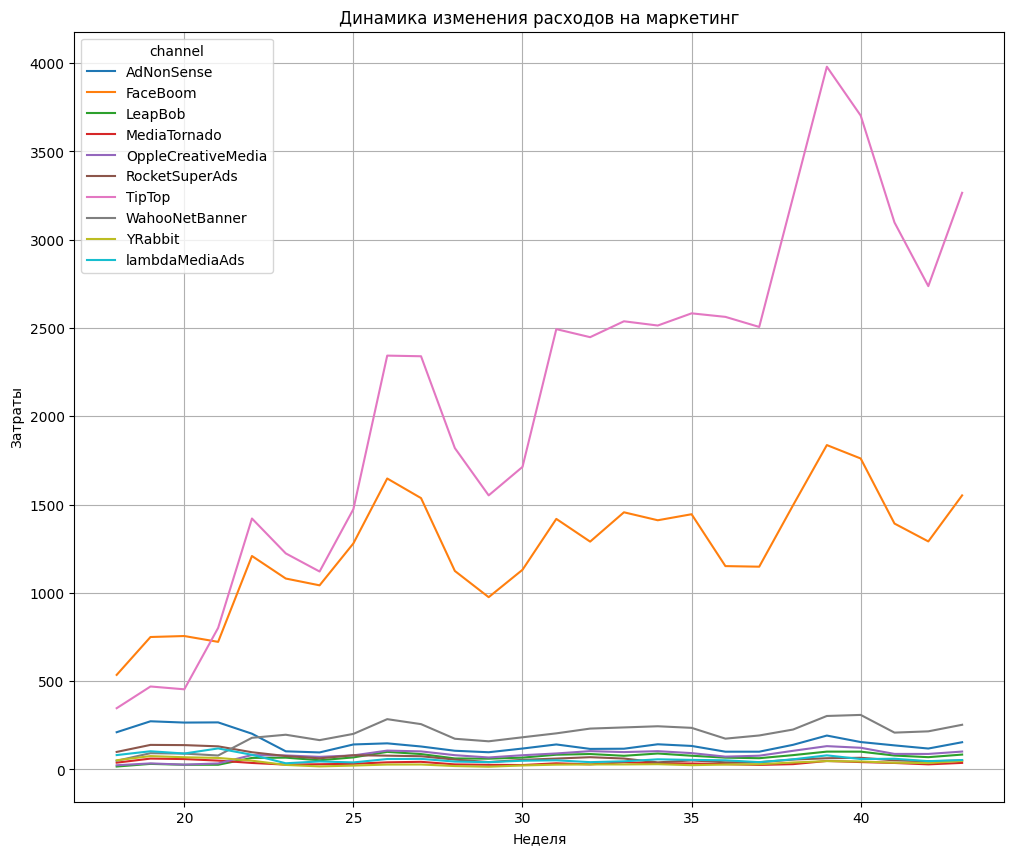

In [27]:
data_m = cost.copy()
data_m['dt'] = pd.to_datetime(data_m['dt'])
data_m['dt'] = data_m['dt'].dt.month
data_m.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    ).plot(                                             
           figsize=(12, 10),
           grid=True,)
plt.title('Динамика изменения расходов на маркетинг')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()
del data_m

data_w = cost.copy()
data_w['dt'] = pd.to_datetime(data_w['dt'])
data_w['dt'] = data_w['dt'].dt.isocalendar().week.astype(int)  
data_w.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    ).plot(                                             
           figsize=(12, 10),
           grid=True,)
plt.title('Динамика изменения расходов на маркетинг')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()
del data_w

Графики динамики расходов на маркетинг по неделям и месяцам показывают, что **источники TipTop и FaceBoom**, несмотря на разные уровни затрат, демонстрируют схожую тенденцию изменения расходов. В **последний месяц наблюдается общее снижение затрат на эти источники**, однако анализ недельного графика свидетельствует о **росте затрат в течение последней недели**. Это указывает на возможную корректировку маркетинговой стратегии или сезонные колебания в расходах.

### Стоимость привлечения пользователя

Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [28]:
display(
    profiles
    .query('channel != "organic"')
    .pivot_table(index='channel',values='acquisition_cost',aggfunc='mean')
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'acquisition_cost_mean'})
    .style.format({'acquisition_cost_mean': '{:.3f}'})
)

,acquisition_cost_mean
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219


Исследование стоимости привлечения пользователей показало значительные различия между источниками. **TipTop характеризуется самой высокой стоимостью** привлечения, составляющей 2.799 на одного пользователя, в то время как **LeapBob демонстрирует самую низкую стоимость** — всего 0.210 на пользователя.

### Вывод

Общая сумма расходов на маркетинг составила 105 497 рублей. **Наибольшие траты были на TipTop и FaceBoom**, что подчеркивает их ключевую роль в маркетинговой стратегии, в то время как **меньшие суммы были выделены на YRabbit и MediaTornado**.

Графики динамики расходов показывают, что **TipTop** и **FaceBoom** имеют схожую тенденцию изменения расходов, несмотря на различия в уровнях затрат. Хотя в последний месяц наблюдается общее снижение расходов на эти источники, недельный график указывает на **рост затрат в последнюю неделю**, что может свидетельствовать о корректировке стратегии или сезонных колебаниях.

Анализ стоимости привлечения пользователей показывает значительные различия между источниками: **TipTop** имеет самую высокую стоимость привлечения — 2,799 рублей на пользователя, тогда как **LeapBob** демонстрирует самую низкую стоимость — 0,210 рублей.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

In [29]:
#момент анализа
observation_date = datetime(2019, 11, 1).date() 
#горизонт анализа
horizon_days = 14 

### Анализ окупаемости рекламы

Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

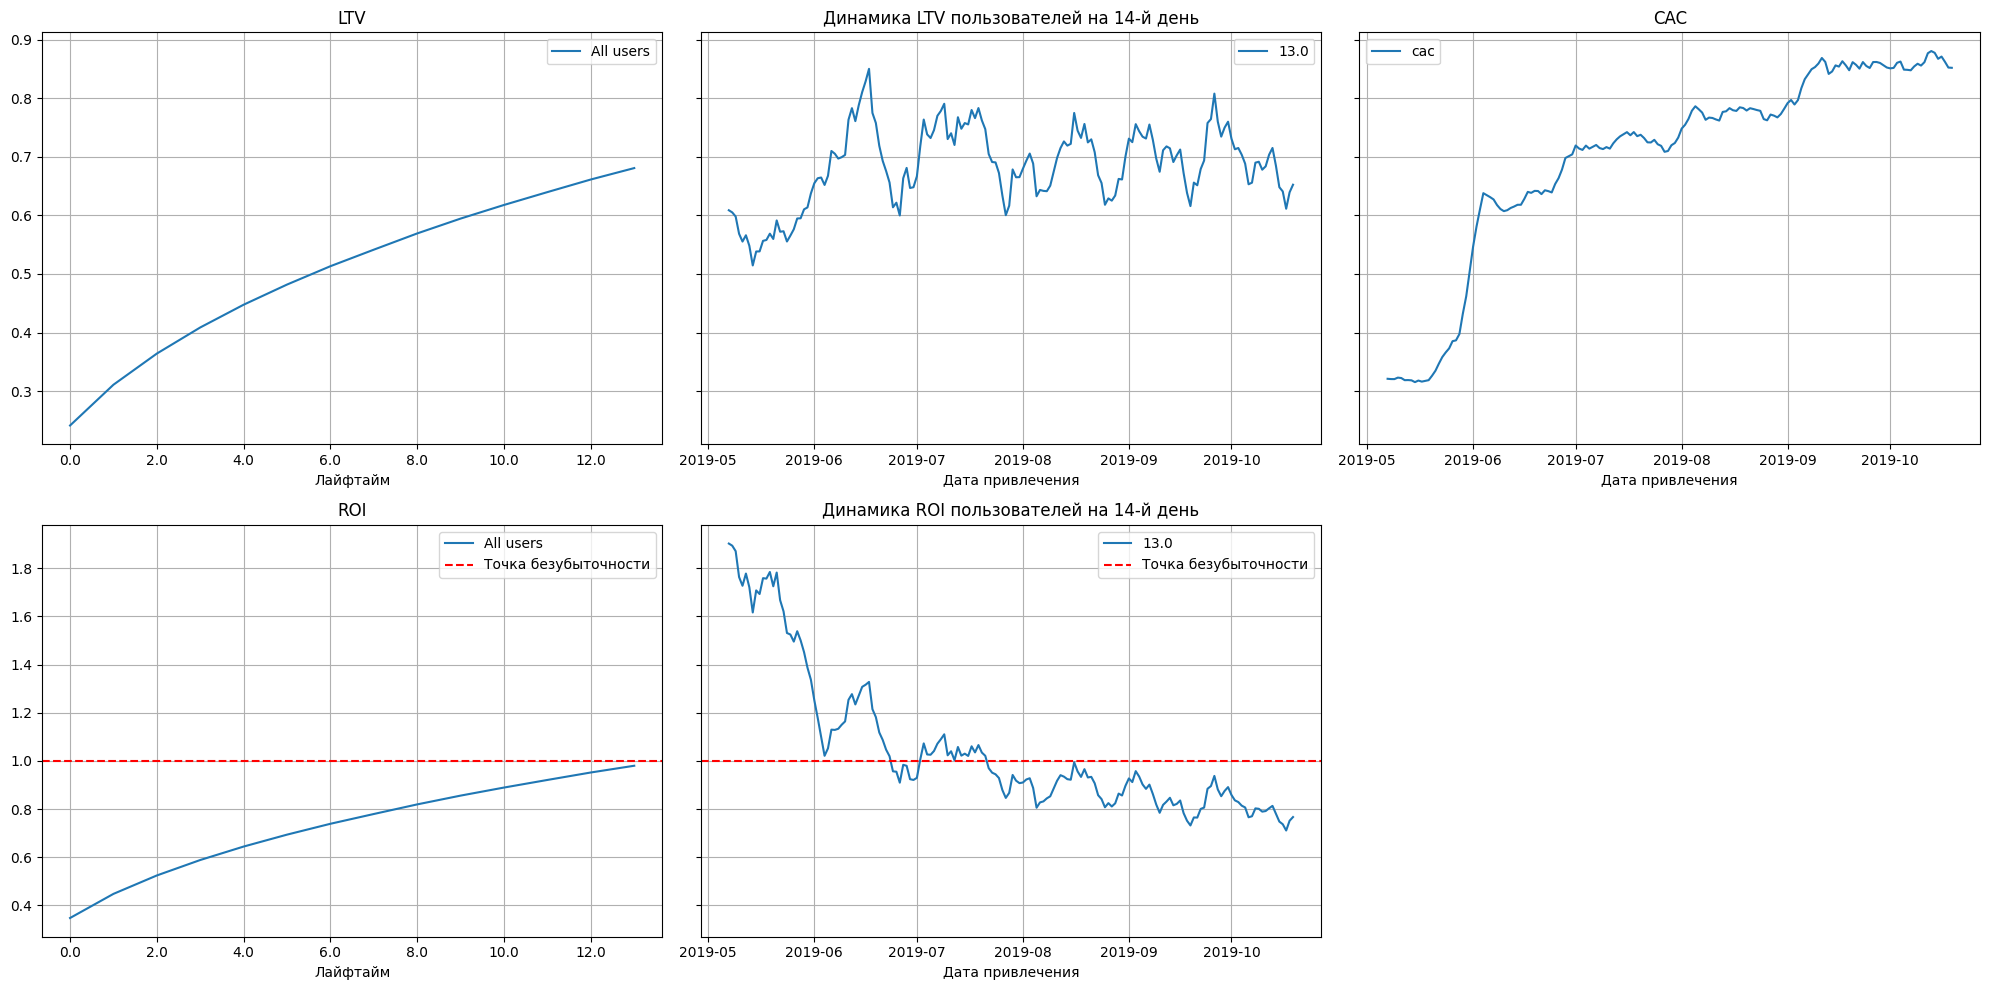

In [30]:
split([],7)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Показатель LTV демонстрирует устойчивый рост на протяжении всего анализируемого периода, что говорит о повышении ценности пользователей для бизнеса с течением времени.
* **CAC (Customer Acquisition Cost)**: Несмотря на некоторые колебания, общая тенденция CAC показывает тенденцию к росту, что может свидетельствовать о повышении стоимости привлечения новых клиентов.
* **ROI (Return on Investment)**: ROI в данном анализе можно считать неудовлетворительным, так как он не достигает точки безубыточности на протяжении всего периода, что указывает на недостаточную эффективность инвестиций в привлечение клиентов.
* **Динамика ROI**: Тренд ROI пользователей клонится к снижению, и хотя он пересекает точку безубыточности только в середине июня 2019 года, общая тенденция к снижению вызывает беспокойство и требует дальнейшего анализа и возможных корректировок в стратегии.

### Анализ окупаемости по устройствам

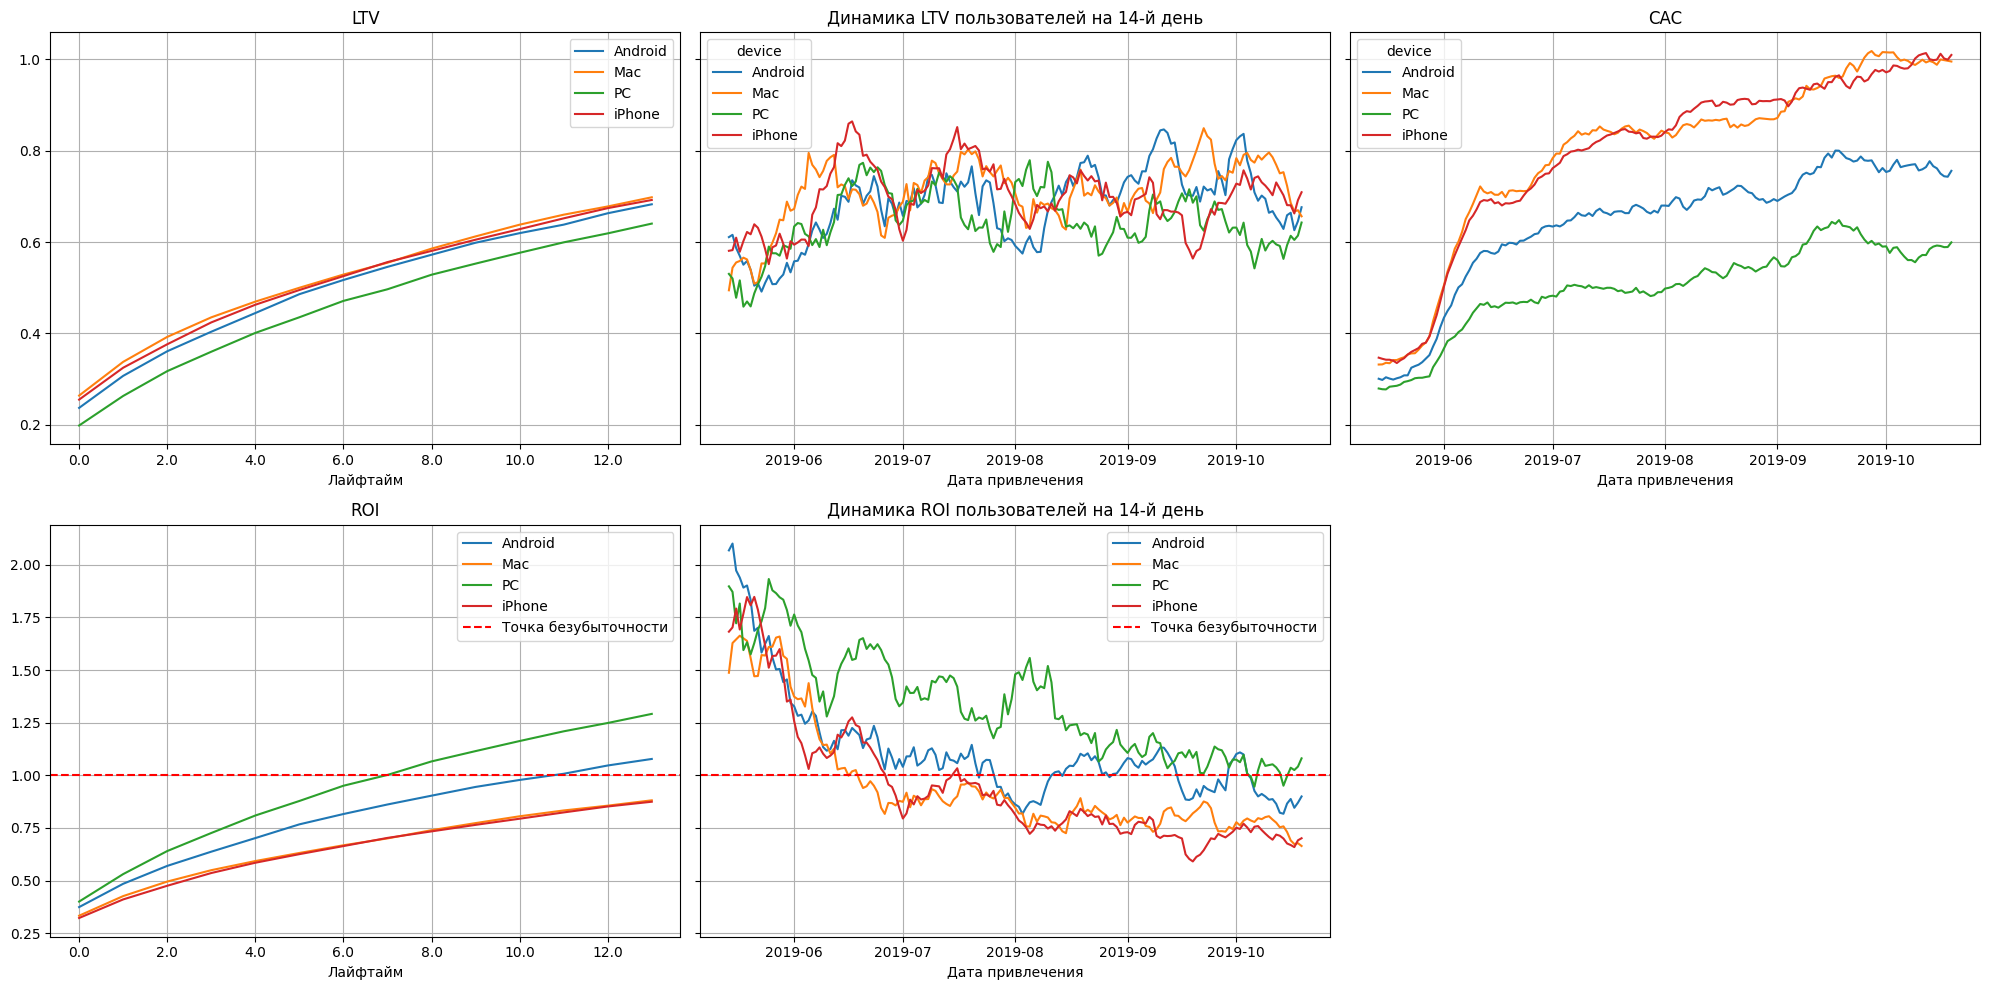

In [31]:
split(['device'],14)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы, разделенных по типам устройств выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Пользователи, использующие Mac, демонстрируют наивысший LTV, что говорит о их высокой ценности для бизнеса. В противоположность, пользователи с PC имеют самый низкий LTV, что может указывать на необходимость пересмотра стратегий удержания и монетизации для этой группы.
* **CAC (Customer Acquisition Cost)**: Затраты на привлечение пользователей с iPhone оказываются наивысшими, что может быть связано с более высокой конкуренцией за рекламные места в экосистеме Apple или с более дорогими рекламными кампаниями, нацеленными на эту аудиторию. В то же время, CAC для пользователей с PC самый низкий, что делает эту группу наиболее экономичной в привлечении.
* **ROI (Return on Investment)**: Пользователи с PC демонстрируют успешный ROI, оставаясь выше точки безубыточности практически на протяжении всего анализируемого периода. Пользователи с Android также достигают положительного ROI, но только после определенного времени, что показывает улучшение эффективности инвестиций в рекламу для этой группы.
* **Динамика ROI**: Большинство устройств, кроме PC, показали переход через точку безубыточности в отрицательную сторону в период с середины мая до середины июня, что может указывать на временные неэффективности в маркетинговых стратегиях или на сезонные колебания в поведении пользователей.

### Анализ окупаемости по странам

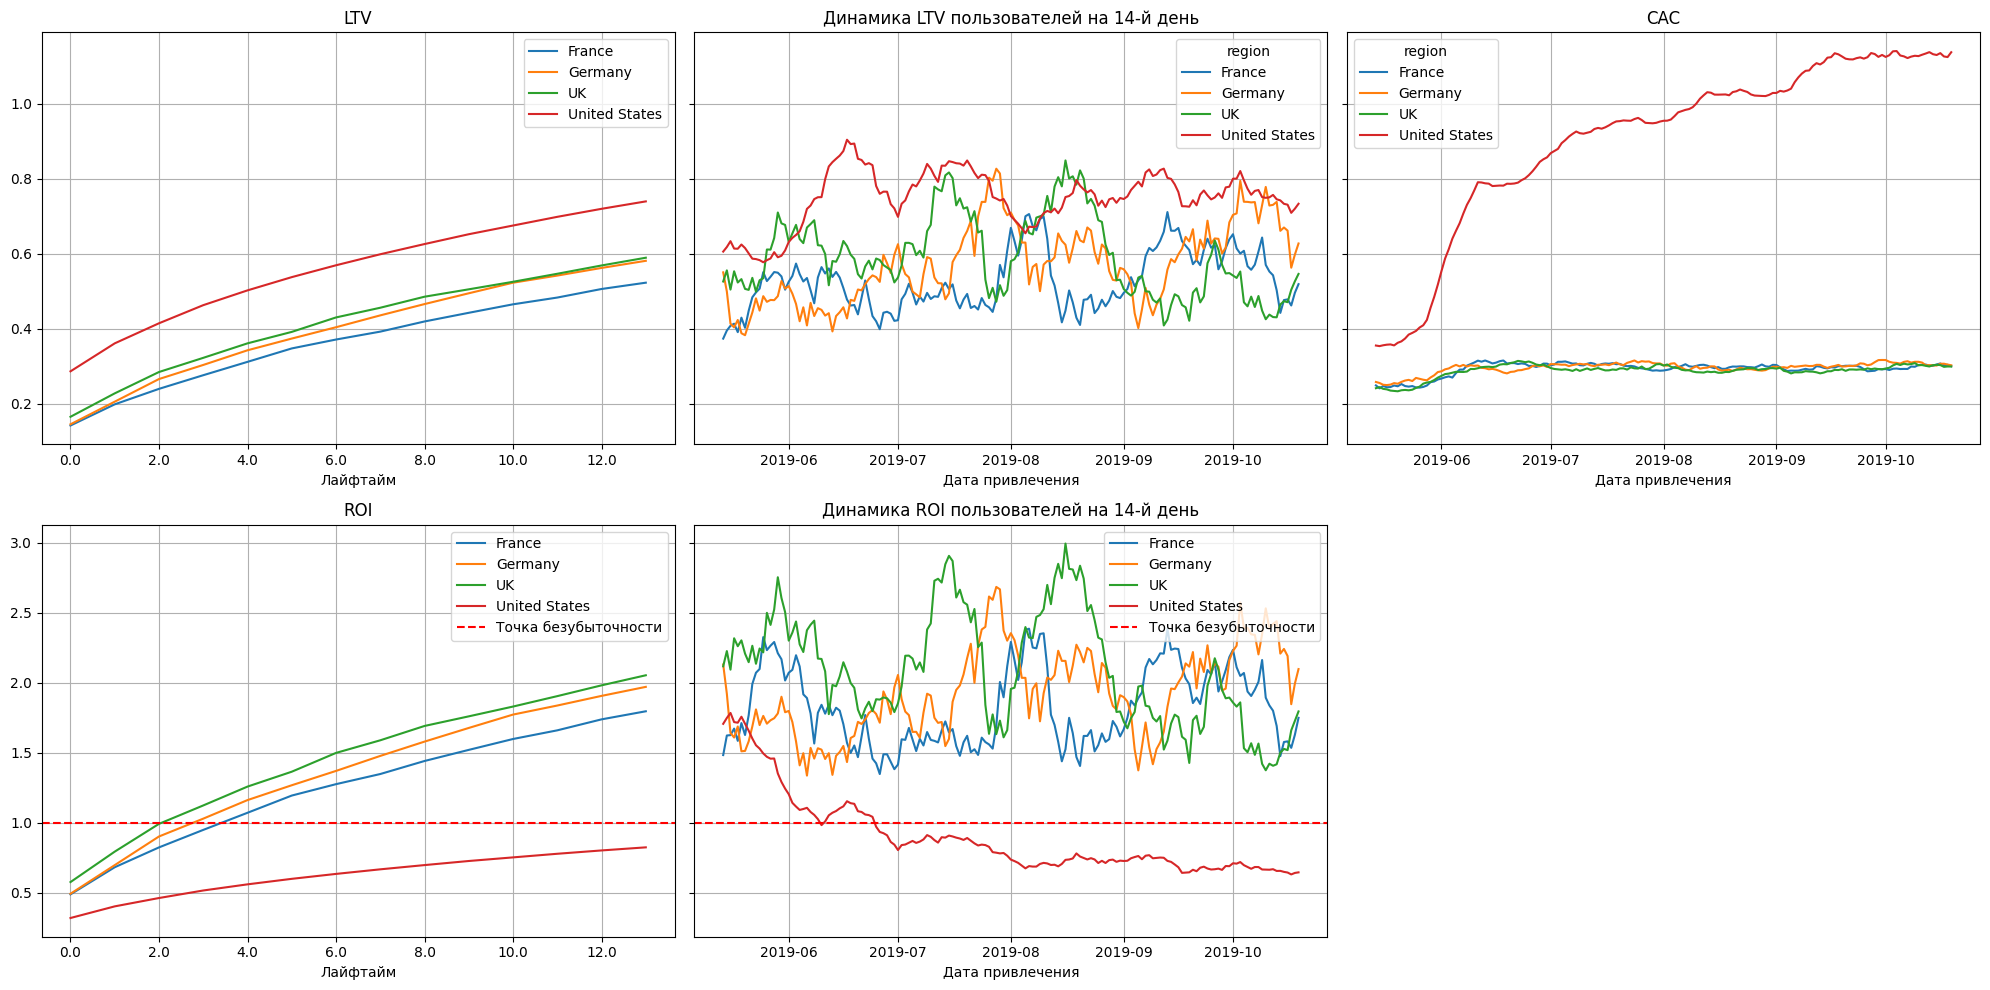

In [32]:
split(['region'],14)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы, разделенных по регионам выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Пользователи из региона United States демонстрируют наивысший LTV, что указывает на их высокую ценность для бизнеса.
* **CAC (Customer Acquisition Cost)**: Интересной тенденцией является рост CAC исключительно для пользователей из United States, что может отражать увеличение конкуренции или стоимости рекламных мест в этом регионе. Для остальных регионов CAC остается относительно стабильным на низком уровне, что говорит о неизменной стратегий привлечения клиентов.
* **ROI (Return on Investment)**: Хотя тренд к росту ROI наблюдается во всех рассматриваемых регионах, только пользователи из UK, Germany, и France демонстрируют устойчиво положительный ROI, пересекая точку безубыточности. Это свидетельствует о том, что маркетинговые стратегии в этих регионах окупаются и приносят прибыль.
* **Динамика ROI**: Пользователи из UK, Germany, и France характеризуются колебаниями в ROI, но при этом остаются выше точки безубыточности, что говорит о стабильной прибыльности инвестиций в рекламу. В отличие от этого, пользователи из United States, несмотря на высокий LTV, не всегда поддерживают ROI выше безубыточности, что может указывать на необходимость оптимизации расходов на рекламу или пересмотра стратегий удержания.

### Анализ окупаемости по рекламным каналам

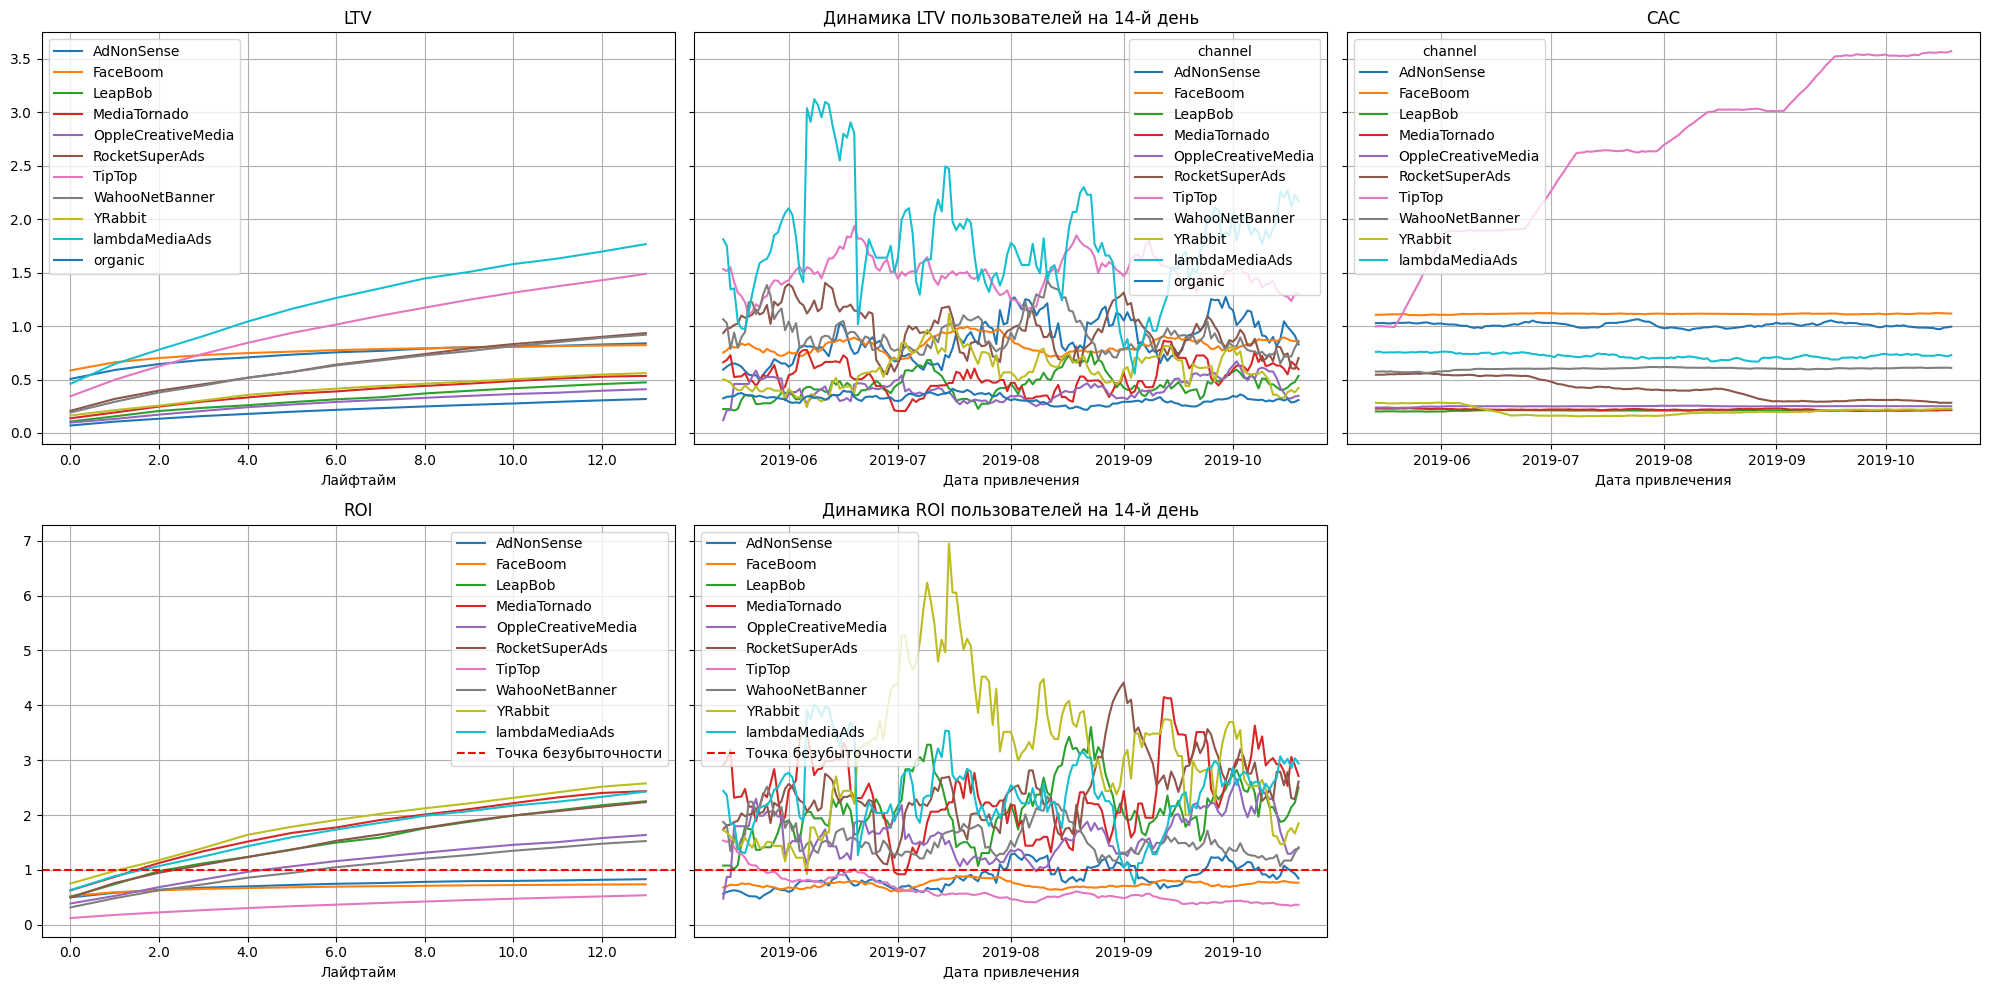

In [33]:
split(['channel'],14)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы, разделенных по рекламным каналам выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Высочайший LTV наблюдается у пользователей, привлеченных через рекламные каналы lambdaMediaAds и TipTop. Это говорит о том, что эти каналы привлекают наиболее ценных клиентов, что может быть обусловлено спецификой аудитории, на которую ориентированы эти платформы, или эффективностью их рекламных стратегий.
* **CAC (Customer Acquisition Cost)**: Рекламный канал TipTop демонстрирует значительный рост CAC, что может указывать на увеличение конкуренции за рекламные места или необходимость оптимизации рекламных материалов и стратегий для снижения стоимости привлечения. Остальные каналы показывают стабильный CAC, что говорит о контролируемых расходах на привлечение.
* **ROI (Return on Investment)**: YRabbit выделяется как лидер по ROI, что делает его наиболее эффективным каналом в плане окупаемости инвестиций в рекламу. Все каналы, кроме AdNonSense, FaceBoom и TipTop, демонстрируют тренд к росту ROI, но остаются за точкой безубыточности, что подчеркивает необходимость стратегических изменений для повышения их эффективности.
* **Динамика ROI**: YRabbit не только лидирует по ROI, но и в июне 2019 года значительно оторвался от других каналов по привлечению пользователей, что подтверждает его высокую эффективность и возможно указывает на удачное стечение обстоятельств, связанных с таргетингом или рекламными креативами.

### Окупается ли реклама, направленная на привлечение пользователей в целом? 

В общем, **реклама не окупается**, так как ROI не достигает точки безубыточности на протяжении всего анализируемого периода. Это указывает на то, что инвестиции в рекламу не приносят достаточного дохода для покрытия расходов на привлечение пользователей.

### Какие устройства, страны и рекламные каналы могут оказывать **негативное влияние** на окупаемость рекламы?

* **Устройства**: Пользователи с **iPhone** имеют высокий CAC, что может негативно влиять на окупаемость из-за высоких затрат на привлечение.
* **Страны**: **United States** имеет высокий LTV, но также и растущий CAC, что может привести к снижению ROI, если не контролировать расходы на рекламу.
* **Рекламные каналы**: **TipTop** показывает и высокий LTV, и значительный рост CAC, что может быть проблематичным для окупаемости. Каналы **AdNonSense и FaceBoom** также не демонстрируют положительного ROI, что делает их потенциально неэффективными.

### Чем могут быть вызваны проблемы окупаемости?

* **Высокие CAC**: Рост стоимости привлечения клиентов, особенно заметный для некоторых устройств и каналов, напрямую влияет на окупаемость, делая рекламные кампании менее прибыльными.
* **Недостаточный LTV**: Низкий LTV для определенных групп пользователей (например, пользователи PC) может не покрывать даже низкие CAC, что делает привлечение таких пользователей невыгодным.
* **Неэффективные стратегии удержания и монетизации**: Если пользователи не совершают повторных покупок или не приносят дохода другими способами после привлечения, это снижает LTV и, соответственно, ROI.
* **Неправильный таргетинг или рекламные материалы**: Если реклама не привлекает аудиторию, которая склонна к конверсии, или рекламные креативы неэффективны, это ведет к высокому CAC при низком ROI.
  
* *Сезонные колебания: Временные спады в ROI могут быть связаны с сезонными изменениями в поведении пользователей или в эффективности рекламных каналов.*

## Вывод

Анализ данных о привлечении пользователей и их взаимодействии с приложением Procrastinate Pro+ за период с 1 мая по 27 октября 2019 года выявил ряд важных тенденций и проблем. Приложение пользуется популярностью на рынке США, особенно среди пользователей iPhone и Mac, где наблюдается высокая доля платящих пользователей. Однако, несмотря на успешное привлечение пользователей и их активность, общая окупаемость инвестиций в рекламу неудовлетворительна, поскольку ROI не достигает точки безубыточности. Это указывает на необходимость оптимизации маркетинговых стратегий и возможной корректировки подходов к удержанию и монетизации пользователей.

Проведенный анализ приложения Procrastinate Pro+ выявил как позитивные, так и негативные стороны текущей маркетинговой стратегии.
  
* Позитивные моменты:
    
1. Растущая база пользователей: Приложение привлекает новых пользователей, что говорит о его потенциале.
2. Высокий LTV для определенных сегментов: Пользователи Mac и пользователи из США демонстрируют высокую пожизненную ценность, что свидетельствует об успешной монетизации в этих сегментах.
3. Эффективность канала YRabbit: Канал YRabbit демонстрирует высокую окупаемость инвестиций и требует дальнейшего масштабирования.

* Негативные моменты:
    
1. Низкая общая окупаемость рекламы: ROI не достигает точки безубыточности на протяжении всего анализируемого периода, что говорит о неэффективности инвестиций в рекламу в целом.
2. Высокая стоимость привлечения: CAC для некоторых устройств (iPhone) и каналов (TipTop) растет, что снижает общую рентабельность.
3. Неэффективность некоторых каналов: Каналы AdNonSense, FaceBoom и TipTop демонстрируют низкий ROI и требуют оптимизации или отказа от них.

* Причины неэффективности привлечения пользователей:

1. Неоптимальное распределение бюджета: Инвестиции в каналы с низким ROI (AdNonSense, FaceBoom, TipTop) не оправдывают себя.
2. Неэффективный таргетинг: Реклама может привлекать пользователей, не склонных к покупкам внутри приложения.
3. Недостаточная работа с удержанием: Низкий LTV для пользователей PC говорит о недостаточных усилиях по удержанию и монетизации этой группы.
4. Высокая конкуренция: Рост CAC для iPhone и пользователей из США может быть связан с высокой конкуренцией в этих сегментах.


Рекомендации для отдела маркетинга:

1. Оптимизация расходов:

* Перераспределение бюджета: Сократить инвестиции в каналы с низким ROI (AdNonSense, FaceBoom, TipTop) и перенаправить средства в эффективный канал YRabbit и другие перспективные каналы.
* A/B тестирование: Проводить A/B тесты креативов и настроек таргетинга для снижения CAC и повышения ROI.

2. Улучшение таргетинга:

* Детальный анализ аудитории: Исследовать портрет платящих пользователей и настроить таргетинг на аналогичные сегменты.
* Использование look-alike аудиторий: Создать look-alike аудитории на базе платящих пользователей для привлечения похожих сегментов.

3. Повышение LTV:

* Разработка программы лояльности: Внедрить систему бонусов и наград для стимулирования повторных покупок.
* Персонализация предложений: Анализировать предпочтения пользователей и предлагать релевантные товары и услуги.
* Улучшение onboarding-процесса: Сделать первое взаимодействие с приложением максимально удобным и полезным для новых пользователей.

4. Работа с отдельными сегментами:

* Разработка стратегии для пользователей PC: Проанализировать причины низкого LTV и разработать мероприятия по увеличению их вовлеченности и монетизации.
* Мониторинг ситуации на рынке США: Отслеживать изменения в CAC и ROI для пользователей из США и корректировать стратегию в соответствии с тенденциями.

5. Постоянный анализ и оптимизация:

* Внедрить систему аналитики: Отслеживать ключевые показатели эффективности маркетинговых кампаний в режиме реального времени.
* Регулярно проводить маркетинговые аудиты: Анализировать эффективность маркетинговых каналов, стратегий и инструментов на регулярной основе.

Внедрение данных рекомендаций позволит повысить эффективность привлечения пользователей, увеличить окупаемость рекламы и добиться устойчивого роста бизнеса.